In [3]:
!pip install -q kaggle

In [15]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanmayikeelisetti","key":"47aa6e55e10ec7c84e06ba51d8b3b1d8"}'}

In [16]:
!mkdir -p ~/.kaggle

In [18]:
!cp kaggle.json ~/.kaggle/

In [20]:
!kaggle datasets download -d deathtrooper/glaucoma-dataset-eyepacs-airogs-light-v2

 99% 520M/524M [00:09<00:00, 80.2MB/s]
100% 524M/524M [00:09<00:00, 55.5MB/s]


In [21]:
import zipfile
zip_ref = zipfile.ZipFile('/content/glaucoma-dataset-eyepacs-airogs-light-v2.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [29]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/eyepac-light-v2-512-jpg/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/eyepac-light-v2-512-jpg/validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8000 files belonging to 2 classes.
Found 770 files belonging to 2 classes.


In [25]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [26]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
250/250 [==============================] - 856s 3s/step - loss: 1.5666 - accuracy: 0.5508 - val_loss: 0.6601 - val_accuracy: 0.6104
Epoch 2/10
250/250 [==============================] - 869s 3s/step - loss: 0.7582 - accuracy: 0.5571 - val_loss: 0.6552 - val_accuracy: 0.6442
Epoch 3/10
250/250 [==============================] - 881s 4s/step - loss: 0.6742 - accuracy: 0.6164 - val_loss: 0.6415 - val_accuracy: 0.6364
Epoch 4/10
250/250 [==============================] - 836s 3s/step - loss: 0.6299 - accuracy: 0.6561 - val_loss: 0.5817 - val_accuracy: 0.6974
Epoch 6/10
250/250 [==============================] - 827s 3s/step - loss: 0.5939 - accuracy: 0.6940 - val_loss: 0.5860 - val_accuracy: 0.6896
Epoch 7/10
250/250 [==============================] - 834s 3s/step - loss: 0.5864 - accuracy: 0.6920 - val_loss: 2.1873 - val_accuracy: 0.4909
Epoch 8/10
250/250 [==============================] - 825s 3s/step - loss: 0.5682 - accuracy: 0.7157 - val_loss: 0.6013 - val_accuracy: 0.6610

In [33]:
import cv2
import matplotlib.pyplot as plt

In [35]:
test_img = cv2.imread('/content/eyepac-light-v2-512-jpg/test/RG/EyePACS-TRAIN-RG-2887.jpg')

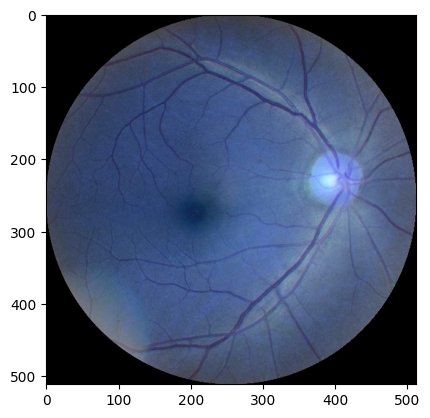

In [42]:
plt.imshow(test_img)

In [37]:
test_img.shape

(512, 512, 3)

In [38]:
test_img = cv2.resize(test_img,(256,256))

In [39]:
test_input = test_img.reshape((1,256,256,3))

In [40]:
model.predict(test_input)

1/1 [==============================] - 0s 145ms/step


array([[0.87307197]], dtype=float32)

In [48]:
test_img1 = cv2.imread('/content/eyepac-light-v2-512-jpg/test/NRG/EyePACS-TRAIN-NRG-2886.jpg')

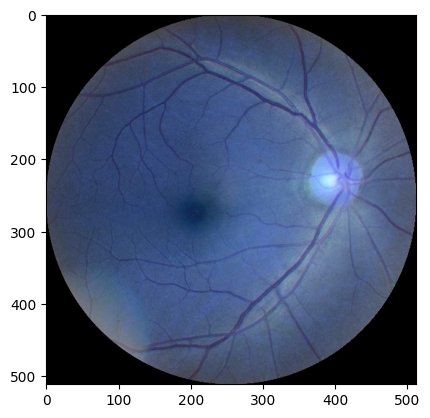

In [49]:
plt.imshow(test_img1)

In [50]:
test_img1.shape

(512, 512, 3)

In [51]:
test_img1 = cv2.resize(test_img,(256,256))

In [52]:
test_input1 = test_img1.reshape((1,256,256,3))

In [53]:
model.predict(test_input1)


1/1 [==============================] - 0s 46ms/step


array([[0.3516913]], dtype=float32)